In [1]:
import pandas as pd
import FuncoesDados
import numpy as np
import matplotlib.pyplot as plt
import tqdm
disciplina = "MT"
dados = FuncoesDados.MicrodadosENEM(nome="MICRODADOS_ENEM_2021.csv", colunas=["TP_FAIXA_ETARIA", f"CO_PROVA_{disciplina}", f"NU_NOTA_{disciplina}",
                                                                             "TP_ANO_CONCLUIU", f"TX_GABARITO_{disciplina}", f"TX_RESPOSTAS_{disciplina}"])
dados = dados.filtrar_dados(dados, [899, 900, 901, 902])
dados.calc_quest_acertadas_total()
display(dados.microdados)
# Para ler e filtrar os dados

Importando...
Importado


100%|██████████████████████████████████████████████████████████████████████| 1904014/1904014 [15:23<00:00, 2061.46it/s]


,TP_FAIXA_ETARIA,TP_ANO_CONCLUIU,CO_PROVA_MT,NU_NOTA_MT,TX_RESPOSTAS_MT,TX_GABARITO_MT,QuestAcertadas
0,4,0,899.0,413.3,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,7
1,5,2,899.0,796.7,EBAEBABDDEBCCBCCDCECBEBDDEABBEBDEDAEDACABDCAB,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,33
2,11,9,899.0,629.5,ECDEBBDACDDCDBBCDCCDCABECDDCBDDDDCAADBCADDEAD,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,17
3,5,3,899.0,590.9,DBDEDECBCDEACBBCBDBEADBCD*EBBEACBBCEBCDDDBCCA,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,15
4,2,0,899.0,411.5,DAAADBDEAEDCBBEBDBCACDDECDABABDABADCAEDEBCCBA,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,5
...,...,...,...,...,...,...,...
1904009,2,0,902.0,404.5,EADCBAAAEAEBCBCEBCDAEAAEDCCAECCDCDEACEEECDBDA,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,9
1904010,7,0,902.0,380.0,CBACDBCDAEAABBDECBACBAAACADABBEEEDCAECEBCAABE,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,6
1904011,3,0,902.0,509.1,BAACBEBCEDDABCABCDAEEAADCBBADCCCCDBBCDEEEDBAE,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,11
1904012,1,0,902.0,554.2,AACCBDBCEDABBCCDADCAAEECCAADEEEDBABBCDBEDBACE,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,13


# Relação entre nota e idade

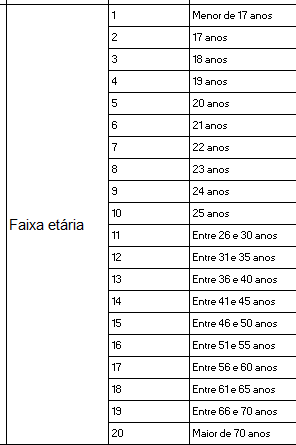

In [2]:
MIN_GRUPO_IDADE = 1
MAX_GRUPO_IDADE = 20
medias = []
for i in range(MIN_GRUPO_IDADE, MAX_GRUPO_IDADE+1):
    micro_filtrado = dados.microdados.loc[dados.microdados["TP_FAIXA_ETARIA"]==i]
    media = micro_filtrado[f"NU_NOTA_{disciplina}"].mean()
    medias.append(media)
# Calcula a média por faixa etária

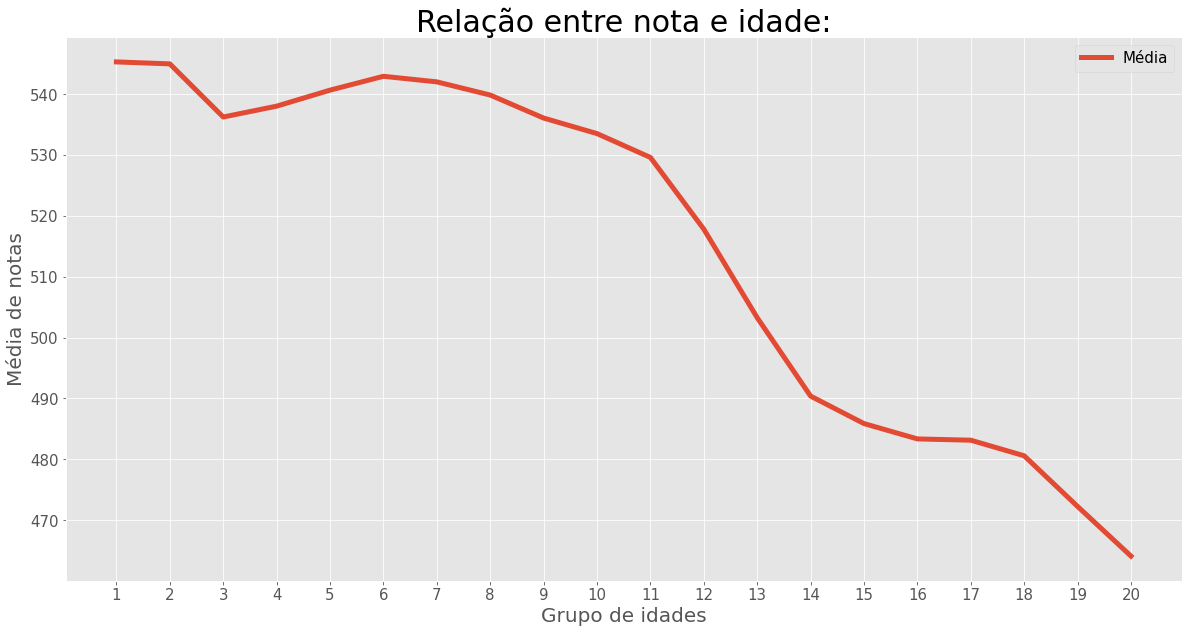

In [3]:
x = np.arange(MIN_GRUPO_IDADE, MAX_GRUPO_IDADE+1, 1)
y = medias

plt.style.use('ggplot')# Seleciona o estilo do gráfico
plt.title("Relação entre nota e idade:", size=30) # Título geral
plt.xlabel("Grupo de idades", size=20)
plt.ylabel("Média de notas", size=20)
plt.gcf().set_size_inches(20, 10)# Tamanho do plot
plt.plot(x, y, linewidth=5.0, label='Média')# Diz quais seram os valores de x e y
plt.xticks(range(MIN_GRUPO_IDADE, MAX_GRUPO_IDADE+1), size=15)
plt.yticks(size=15)# Escala e tamanho da letra dos eixos

plt.legend(fontsize=15)

# Relação entre ano de conclusão e nota

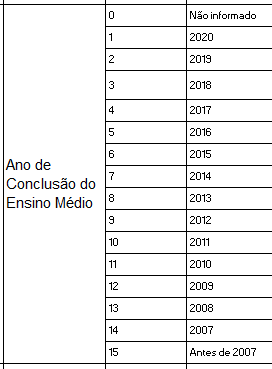

In [4]:
MIN_GRUPO_ANO = 1
MAX_GRUPO_ANO = 15
medias = []
for i in range(MIN_GRUPO_ANO, MAX_GRUPO_ANO+1):
    micro_filtrado = dados.microdados.loc[dados.microdados["TP_ANO_CONCLUIU"]==i]
    media = micro_filtrado[f"NU_NOTA_{disciplina}"].mean()
    medias.append(media)
# Calcula a média pelo ano de conclusão

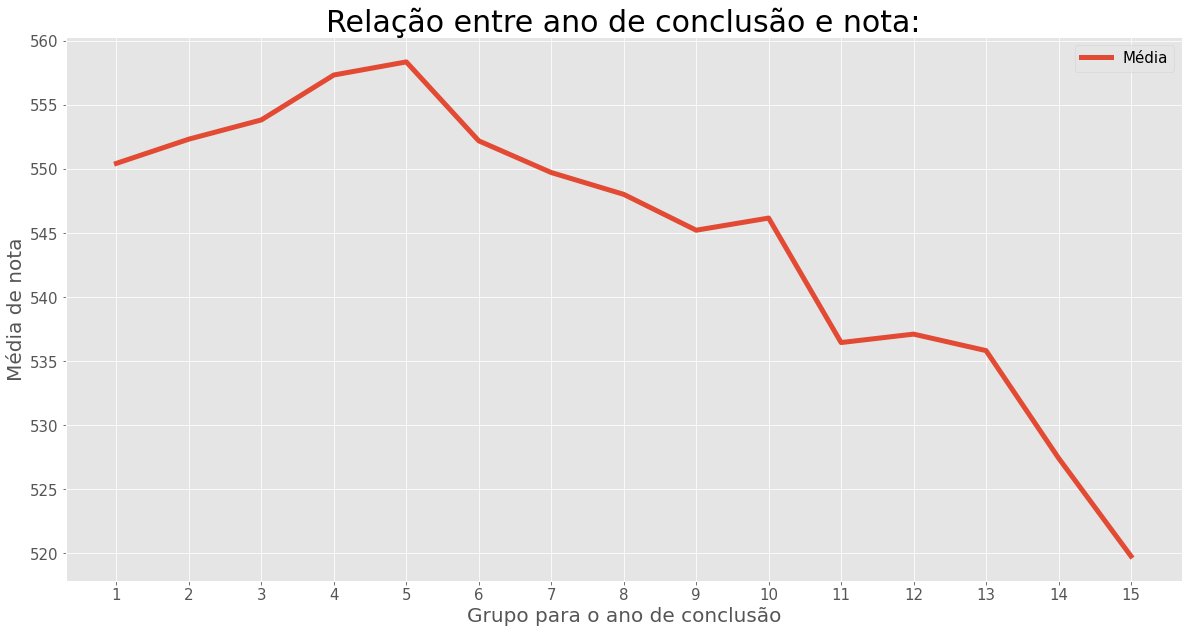

In [5]:
x = np.arange(MIN_GRUPO_ANO, MAX_GRUPO_ANO+1, 1)
y = medias

plt.style.use('ggplot')# Seleciona o estilo do gráfico
plt.title("Relação entre ano de conclusão e nota:", size=30) # Título geral
plt.xlabel("Grupo para o ano de conclusão", size=20)
plt.ylabel("Média de nota", size=20)
plt.gcf().set_size_inches(20, 10)# Tamanho do plot
plt.plot(x, y, linewidth=5.0, label='Média')# Diz quais seram os valores de x e y
plt.xticks(range(MIN_GRUPO_ANO, MAX_GRUPO_ANO+1), size=15)
plt.yticks(size=15)# Escala e tamanho da letra dos eixos

plt.legend(fontsize=15)

# Quantidade de notas

In [6]:
def arredondar(valor):
    return (valor//10)*10
dados.microdados["NU_NOTA_MT"] = list(map(arredondar, dados.microdados["NU_NOTA_MT"]))
display(dados.microdados)
# Arredonda as notas

,TP_FAIXA_ETARIA,TP_ANO_CONCLUIU,CO_PROVA_MT,NU_NOTA_MT,TX_RESPOSTAS_MT,TX_GABARITO_MT,QuestAcertadas
0,4,0,899.0,410.0,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,7
1,5,2,899.0,790.0,EBAEBABDDEBCCBCCDCECBEBDDEABBEBDEDAEDACABDCAB,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,33
2,11,9,899.0,620.0,ECDEBBDACDDCDBBCDCCDCABECDDCBDDDDCAADBCADDEAD,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,17
3,5,3,899.0,590.0,DBDEDECBCDEACBBCBDBEADBCD*EBBEACBBCEBCDDDBCCA,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,15
4,2,0,899.0,410.0,DAAADBDEAEDCBBEBDBCACDDECDABABDABADCAEDEBCCBA,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,5
...,...,...,...,...,...,...,...
1904009,2,0,902.0,400.0,EADCBAAAEAEBCBCEBCDAEAAEDCCAECCDCDEACEEECDBDA,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,9
1904010,7,0,902.0,380.0,CBACDBCDAEAABBDECBACBAAACADABBEEEDCAECEBCAABE,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,6
1904011,3,0,902.0,500.0,BAACBEBCEDDABCABCDAEEAADCBBADCCCCDBBCDEEEDBAE,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,11
1904012,1,0,902.0,550.0,AACCBDBCEDABBCCDADCAAEECCAADEEEDBABBCDBEDBACE,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,13


In [7]:
MIN_NOTA = 1
MAX_NOTA = 1000
medias = []
quants = []
for i in range(MIN_NOTA, MAX_NOTA+1):
    micro_filtrado = dados.microdados.loc[dados.microdados[f"NU_NOTA_{disciplina}"]==i]
    media = micro_filtrado[f"NU_NOTA_{disciplina}"].mean()
    if np.isnan(media):
        continue
    medias.append(media)
    quant = micro_filtrado.loc[:, f"NU_NOTA_{disciplina}"].count()
    quants.append(quant)

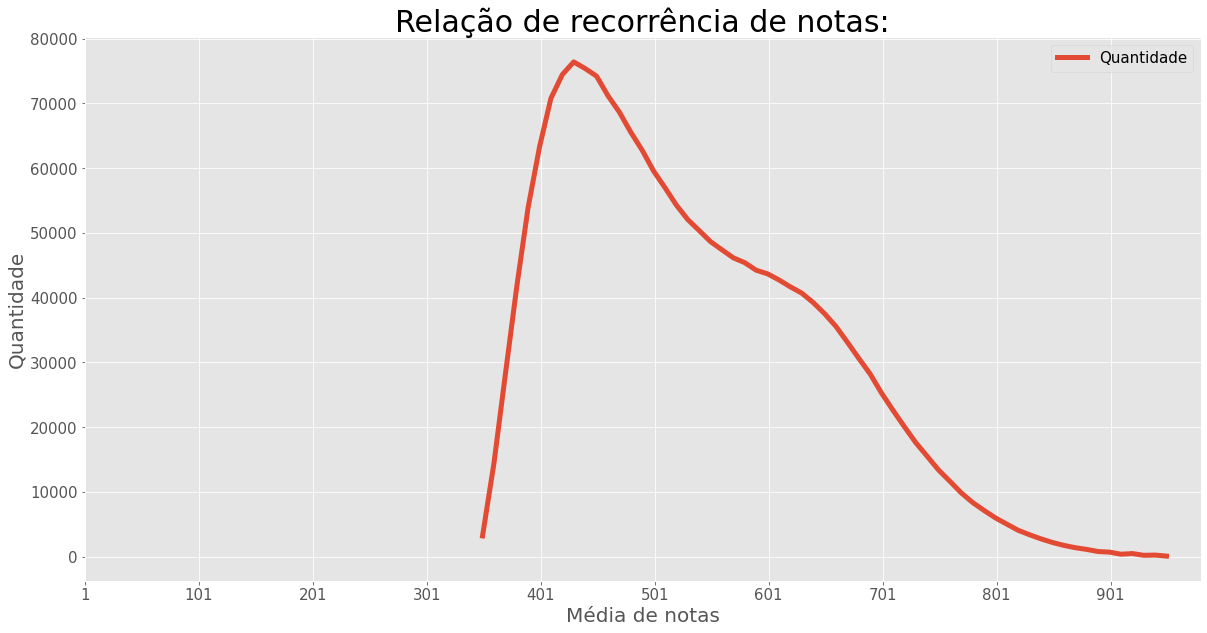

In [8]:
x = medias
y = quants

plt.style.use('ggplot')# Seleciona o estilo do gráfico
plt.title("Relação de recorrência de notas:", size=30) # Título geral
plt.xlabel("Média de notas", size=20)
plt.ylabel("Quantidade", size=20)
plt.gcf().set_size_inches(20, 10)# Tamanho do plot
plt.plot(x, y, linewidth=5.0, label='Quantidade')# Diz quais seram os valores de x e y
plt.xticks(range(MIN_NOTA, MAX_NOTA+1, 100), size=15)
plt.yticks(size=15)# Escala e tamanho da letra dos eixos

plt.legend(fontsize=15)

# Relação entre quantidade de acertos e nota

In [9]:
QUANT_QUESTOES = 45
questoes = []
minimos = []
medias = []
maximos = []
for i in range(1, QUANT_QUESTOES+1):
    micro_filtrados = dados.microdados.loc[dados.microdados["QuestAcertadas"] == i]
    minimo = micro_filtrados[f"NU_NOTA_{disciplina}"].min()
    media = micro_filtrados[f"NU_NOTA_{disciplina}"].mean()
    maximo = micro_filtrados[f"NU_NOTA_{disciplina}"].max()
    questoes.append(i)
    minimos.append(minimo)
    medias.append(media)
    maximos.append(maximo)
# Calculando as relações entre as notas e a quantidade de acertos com média, máximos e mínimos

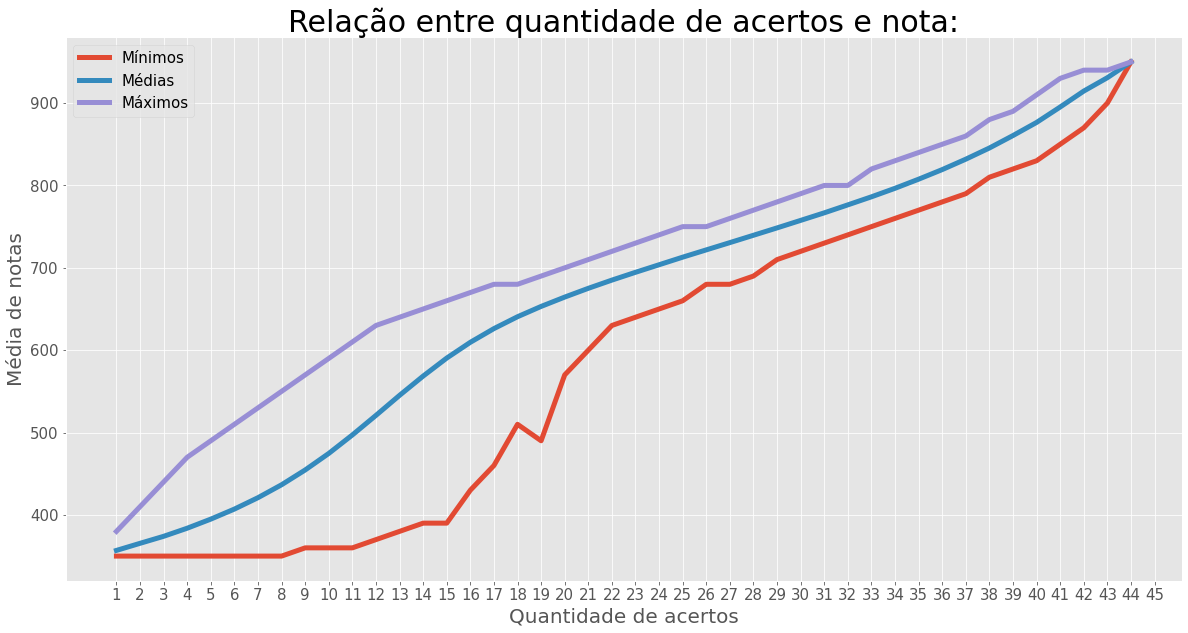

In [10]:
plt.style.use('ggplot')# Seleciona o estilo do gráfico
plt.title("Relação entre quantidade de acertos e nota:", size=30) # Título geral
plt.xlabel("Quantidade de acertos", size=20)
plt.ylabel("Média de notas", size=20)
plt.gcf().set_size_inches(20, 10)# Tamanho do plot
plt.plot(questoes, minimos, linewidth=5.0, label="Mínimos")# Diz quais seram os valores de x e y
plt.plot(questoes, medias, linewidth=5.0, label="Médias")
plt.plot(questoes, maximos, linewidth=5.0, label="Máximos")# Plota os valores médios, mínimos e máximos
plt.xticks(range(1, QUANT_QUESTOES+1), size=15)
plt.yticks(size=15)# Escala e tamanho da letra dos eixos

plt.legend(fontsize=15)